# Background

# Evaluation

# used later in the code

In [1]:
import pandas as pd
import numpy as np
from collections import Counter # making word count dictionary
import collections # sorting word count dictionary
import math

In [2]:
# to flatten list-ception
flatten = lambda *n: (e for a in n for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,))) 

In [282]:
# for counting how many numbers of one list belongs to another
def count_finder(l1,l2,n):
    counter = 0
    for i in l1:
        if(i in l2):
            counter +=1
    return (counter/n)*100

# EDA

In [359]:
train_df = pd.read_csv('training_1.csv')
train_df.head()

id  category                                               text
0  959         0    5573 1189 4017 1207 4768 8542 17 1189 5085 5773
1  994         0       6315 7507 6700 4742 1944 2692 3647 4413 6700
2  995         0                      5015 8067 5335 1615 7957 5773
3  996         0  2925 7199 1994 4647 7455 5773 4518 2734 2807 8...
4  997         0                  7136 1207 6781 237 4971 3669 6193

In [358]:
# cleaner
train_df = pd.read_csv('training_1.csv')
train_df['text'] = train_df['text'].apply(lambda  s: s.split(" "))
train_df['text'] = train_df['text'].apply(lambda  s: list(set(common_words)-set(s)))
train_df['text'] = train_df['text'].apply(lambda  s: (" ").join(s))
train_df.head()

id  category                                               text
0  959         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
1  994         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
2  995         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
3  996         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
4  997         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...

In [335]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 3 columns):
id          3464 non-null int64
category    3464 non-null int64
text        3464 non-null object
dtypes: int64(2), object(1)
memory usage: 81.3+ KB


In [336]:
train_df['category'].value_counts()

0    3348
1     116
Name: category, dtype: int64

> ## Since the class is highly imbalanced, 97:3 ratio, two ways can be implemented
> * One is the non-algorithmic way
> * Another, is the ML way as suggested in title

# Idea 1: Logically find out which are the words impacting the categories by finding its occurance

In [337]:
# finding numbers that occur most in each category
zeros_text = list(flatten([i.split(" ") for i in  list(train_df[train_df.category==0]["text"].values)]))
ones_text = list(flatten([i.split(" ") for i in  list(train_df[train_df.category==1]["text"].values)]))

In [338]:
# Some statistics about the words and thier occurances
print("Basic stats about the data:\n\n")
total_words = list(set(list(flatten([i.split(" ") for i in list(train_df["text"].values)]))))
print("Total # of words in training : {}".format(len(total_words)))
common_words = list(set(zeros_text) & set(ones_text))
print("# of words in occuring both the categories : {}".format(len(common_words)))
exclusive_zeros = list(set(zeros_text) - set(ones_text))
print("# of words in occuring only in 'zero' category : {}".format(len(exclusive_zeros)))
exclusive_ones = list(set(ones_text) - set(zeros_text))
print("# of words in occuring only in 'one' category : {}".format(len(exclusive_ones)))

Basic stats about the data:


Total # of words in training : 632
# of words in occuring both the categories : 632
# of words in occuring only in 'zero' category : 0
# of words in occuring only in 'one' category : 0


In [341]:
zero_total = 0
for i,j in zeros_count:
    zero_total += j
one_total = 0
for i,j in ones_count:
    one_total += j

In [342]:
# count of each word and its frequency (not used below)
zeros_count = sorted(Counter(zeros_text).items(), key=lambda pair: pair[1], reverse=True)
ones_count = sorted(Counter(ones_text).items(), key=lambda pair: pair[1], reverse=True)

In [345]:
# finding how many zero and one words occur in each line
train_df["ones_count"] = train_df.text.apply(lambda s: count_finder(s.split(" "),ones_text,one_total))
train_df["zeros_count"] = train_df.text.apply(lambda s: count_finder(s.split(" "),zeros_text,zero_total))

In [350]:
# applying the logic to categorize
train_df["one_by_zero"] = train_df["ones_count"]/train_df["zeros_count"]
only_one = train_df[train_df.category!=1]["one_by_zero"]
train_df["one_or_zero_by_logic"] = train_df["one_by_zero"].apply(lambda s : 1 if s>min(list(only_one.values)) else 0)

In [351]:
#checking if the logic worked
correctly_classified = train_df[train_df.category==train_df.one_or_zero_by_logic]

In [352]:
# metric to check the effectiveness of the logic
accuracy = (correctly_classified.shape[0]/train_df.shape[0])*100
print('''==================================================================\n
RESULT on training :\nThe precision based accuracy of this logic is : {}
\n=================================================================='''.format(accuracy))


RESULT on training :
The precision based accuracy of this logic is : 96.65127020785219



In [353]:
error_classified = train_df[train_df.category!=train_df.one_or_zero_by_logic]
error_classified

id  category                                               text  \
3348  4104         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3349  4114         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3350  4127         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3351  4129         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3352  4140         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3353  4147         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3354  4151         1  3281 4920 3738 6461 5608 5045 5300 3751 747 34...   
3355  4168         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3356  4176         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3357  4180         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3358  4192         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3359  4193         1  3281 4920 3738 6461 711 5608 5045 5300 747 918...   
3360  4210         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3361  4211         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3362  4215         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3363  4227         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3364  4229         1  3281 4920 6461 711 5608 5045 5300 3751 747 348...   
3365  4230         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3366  4247         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3367  4253         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3368  4266         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3369  4274         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3370  4280         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3371  4289         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3372  4290         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3373  4292         1  3281 4920 3738 6461 711 5608 5300 3751 747 348...   
3374  4299         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3375  4303         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3376  4305         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3377  4317         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
...    ...       ...                                                ...   
3434  4763         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3435  4786         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3436  4788         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3437  4799         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3438  4802         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3439  4809         1  3281 4920 3738 711 5608 5045 5300 3751 3485 91...   
3440  4828         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3441  4829         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3442  4834         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3443  4835         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3444  4836         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3445  4837         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3446  4838         1  3281 3738 711 5608 5045 5300 3751 747 3485 918...   
3447  4839         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3448  4840         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3449  4841         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3450  4842         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3451  4843         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...   
3452  4844         1  3281 4920 3738 6461 711 5608 5045 5300 3751 34...   
3453  4845         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3454  4846         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...   
3455  4847         1  3281 4920 3

> ## Idea 1:  4 were missclassifed out of 3464 rows, in "training dataset" giving accuracy of 99.885%

# applying the same on "test dataset"

In [356]:
test = pd.read_csv('test.csv')

# finding how many zero and one words come in each line
test["ones_count"] = test.text.apply(lambda s: count_finder(s.split(" "),ones_text,one_total))
test["zeros_count"] = test.text.apply(lambda s: count_finder(s.split(" "),zeros_text,zero_total))

KeyboardInterrupt: 

In [ ]:
# applying the logic derived from above
test["one_by_zero"] = test["ones_count"]/test["zeros_count"]
only_one = train_df[train_df.category==1]["one_by_zero"]
test["category"] = test["one_by_zero"].apply(lambda s : 1 if s>29.6 else 0)
test.category.value_counts()

In [ ]:
test[test["category"]==1]

### RESULT on test
> ### The test is almost all negative review except for 1 as per the logical technique

In [316]:
test[["id","category"]].to_csv("submission 1.csv",index=False)

# with cleaner data

In [332]:
train_df = pd.read_csv('training_1.csv')
train_df['text'] = train_df['text'].apply(lambda  s: s.split(" "))
train_df['text'] = train_df['text'].apply(lambda  s: list(set(common_words)-set(s)))
train_df['text'] = train_df['text'].apply(lambda  s: (" ").join(s))
train_df.head()

id  category                                               text
0  959         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
1  994         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
2  995         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
3  996         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...
4  997         0  3281 4920 3738 6461 5608 711 5045 5300 747 375...

In [333]:
# finding numbers that occur most in each category
zeros_text = list(flatten([i.split(" ") for i in  list(train_df[train_df.category==0]["text"].values)]))
ones_text = list(flatten([i.split(" ") for i in  list(train_df[train_df.category==1]["text"].values)]))# Some statistics about the words and thier occurances
print("Basic stats about the data:\n\n")
total_words = list(set(list(flatten([i.split(" ") for i in list(train_df["text"].values)]))))
print("Total # of words in training : {}".format(len(total_words)))
common_words = list(set(zeros_text) & set(ones_text))
print("# of words in occuring both the categories : {}".format(len(common_words)))
exclusive_zeros = list(set(zeros_text) - set(ones_text))
print("# of words in occuring only in 'zero' category : {}".format(len(exclusive_zeros)))
exclusive_ones = list(set(ones_text) - set(zeros_text))
print("# of words in occuring only in 'one' category : {}".format(len(exclusive_ones)))
zero_total = 0
for i,j in zeros_count:
    zero_total += j
one_total = 0
for i,j in ones_count:
    one_total += j
# count of each word and its frequency (not used below)
zeros_count = sorted(Counter(zeros_text).items(), key=lambda pair: pair[1], reverse=True)
ones_count = sorted(Counter(ones_text).items(), key=lambda pair: pair[1], reverse=True)
# finding how many zero and one words occur in each line
train_df["ones_count"] = train_df.text.apply(lambda s: count_finder(s.split(" "),ones_text,one_total))
train_df["zeros_count"] = train_df.text.apply(lambda s: count_finder(s.split(" "),zeros_text,zero_total))
# applying the logic to categorize
train_df["one_by_zero"] = train_df["ones_count"]/train_df["zeros_count"]
only_one = train_df[train_df.category!=1]["one_by_zero"]
train_df["one_or_zero_by_logic"] = train_df["one_by_zero"].apply(lambda s : 1 if s>max(list(only_one.values)) else 0)
#checking if the logic worked
correctly_classified = train_df[train_df.category==train_df.one_or_zero_by_logic]
# metric to check the effectiveness of the logic
accuracy = (correctly_classified.shape[0]/train_df.shape[0])*100
print('''==================================================================\n
RESULT on training :\nThe precision based accuracy of this logic is : {}
\n=================================================================='''.format(accuracy))
error_classified = train_df[train_df.category!=train_df.one_or_zero_by_logic]
error_classified
test = pd.read_csv('test.csv')

# finding how many zero and one words come in each line
test["ones_count"] = test.text.apply(lambda s: count_finder(s.split(" "),ones_text,one_total))
test["zeros_count"] = test.text.apply(lambda s: count_finder(s.split(" "),zeros_text,zero_total))

# applying the logic derived from above
test["one_by_zero"] = test["ones_count"]/test["zeros_count"]
only_one = train_df[train_df.category==1]["one_by_zero"]
test["category"] = test["one_by_zero"].apply(lambda s : 1 if s>=min(list(only_one.values))  else 0)
test.category.value_counts()
test[test["category"]==1]

Basic stats about the data:


Total # of words in training : 632
# of words in occuring both the categories : 632
# of words in occuring only in 'zero' category : 0
# of words in occuring only in 'one' category : 0

RESULT on training :
The precision based accuracy of this logic is : 96.65127020785219



KeyboardInterrupt: 

# Idea 2: Use machine learning

In [244]:
from sklearn.model_selection import train_test_split # step 1
from sklearn.feature_extraction.text import CountVectorizer # step 2
from sklearn.feature_extraction.text import TfidfTransformer # step 3
from sklearn.pipeline import Pipeline # to shorten the code

# models step 4
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV 
import sklearn.linear_model as sk_lm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 

# CV
from sklearn.cross_validation import cross_val_score, cross_val_predict

# accuracy
from sklearn import metrics # step 5

#for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# to stop warning display
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [18]:
# to store results
result = {}
ensemble = {}

In [19]:
# training and validation check
x_train, x_test, y_train, y_test = train_test_split(train_df.text, train_df.category, test_size=0.3, random_state=42)

In [20]:
# vectorizing
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
x_train_counts.shape

(2424, 7170)

In [21]:
# TF-IDF
tt = TfidfTransformer()
x_train_tfidf = tt.fit_transform(x_train_counts)
x_train_tfidf.shape

(2424, 7170)

In [22]:
# Naive bayes
text_fitter_nb = Pipeline([('vect', count_vect), ('tfidf', tt), ('clf', MultinomialNB())])
text_fitter_nb = text_fitter_nb.fit(x_train, y_train)
classified_nb = text_fitter_nb.predict(x_train)
result["naive_bayes"] = np.mean(classified_nb == y_train)
np.mean(classified_nb == y_train)

0.9678217821782178

In [23]:
ensemble["naive_bayes"] = classified_nb
print(metrics.confusion_matrix(y_train, classified_nb)) 

[[2334    0]
 [  78   12]]


In [24]:
# Grid Search for naive bayes
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
text_fitter_nb_gcv = GridSearchCV(text_fitter_nb, parameters, n_jobs=-1)
text_fitter_nb_gcv = text_fitter_nb_gcv.fit(x_train, y_train)
text_fitter_nb_gcv.best_params_
result["naive_bayes_gs"] = text_fitter_nb_gcv.best_score_
text_fitter_nb_gcv.best_score_

0.9942244224422442

In [25]:
# SVM
text_fitter_svm = Pipeline([('vect', count_vect), ('tfidf', tt),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])
text_fitter_svm = text_fitter_svm.fit(x_train, y_train)
classified_svm = text_fitter_svm.predict(x_train)
result["SVM"] = np.mean(classified_svm == y_train)
np.mean(classified_svm == y_train)

0.9884488448844885

In [26]:
ensemble["SVM"] = classified_svm
print(metrics.confusion_matrix(y_train, classified_svm)) 

[[2334    0]
 [  28   62]]


In [27]:
# Grid Search for SVM
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}
text_fitter_gcv = GridSearchCV(text_fitter_svm, parameters, n_jobs=-1)
text_fitter_svm_gcv = GridSearchCV(text_fitter_svm, parameters_svm, n_jobs=-1)
text_fitter_svm_gcv = text_fitter_svm_gcv.fit(x_train, y_train)
text_fitter_svm_gcv.best_params_
result["SVM_GS"] = text_fitter_svm_gcv.best_score_
text_fitter_svm_gcv.best_score_

0.9843234323432343

In [28]:
# logistic
text_fitter_log = Pipeline([('vect', count_vect), ('tfidf', tt), ('clf', sk_lm.LogisticRegression(penalty="l1",C =0.5,max_iter=1000))])
text_fitter_log.fit(x_train,y_train)
classified_log = text_fitter_log.predict(x_train)
result["log"] = np.mean(classified_log == y_train)
np.mean(classified_log == y_train)

0.9715346534653465

In [29]:
ensemble["log"] = classified_log
print(metrics.confusion_matrix(y_train, classified_log)) 

[[2331    3]
 [  66   24]]


In [30]:
# Random forest entorpy
text_fitter_rf_e = Pipeline([('vect', count_vect), ('tfidf', tt), ('clf', RandomForestClassifier(criterion="entropy"))])
text_fitter_rf_e.fit(x_train,y_train)
classified_rf_e = text_fitter_rf_e.predict(x_train)
result["rf_e"] = np.mean(classified_rf_e == y_train)
np.mean(classified_rf_e == y_train)

0.9987623762376238

In [31]:
ensemble["rf_e"] = classified_rf_e
print(metrics.confusion_matrix(y_train, classified_rf_e)) 

[[2334    0]
 [   3   87]]


In [32]:
# Random forest gini
text_fitter_rf_g = Pipeline([('vect', count_vect), ('tfidf', tt), ('clf', RandomForestClassifier(criterion="gini"))])
text_fitter_rf_g.fit(x_train,y_train)
classified_rf_g = text_fitter_rf_g.predict(x_train)
result["rf_g"] = np.mean(classified_rf_g == y_train)
np.mean(classified_rf_g == y_train)

0.9987623762376238

In [33]:
ensemble["rf_g"] = classified_rf_g
print(metrics.confusion_matrix(y_train, classified_rf_g)) 

[[2334    0]
 [   3   87]]


In [34]:
# using emsemble modelling
ensemble_df = pd.DataFrame.from_dict(ensemble,orient='index').T
ensemble_df.index = range(ensemble_df.shape[0])
ensemble_df["ensemble"] = ensemble_df.apply(lambda s: s.mean(), axis=1)
ensemble_df["ensemble"] = ensemble_df["ensemble"].apply(lambda x : 1 if x>0.5 else 0)
ensemble_df.head()

naive_bayes  log  rf_g  SVM  rf_e  ensemble
0            0    0     0    0     0         0
1            0    0     0    0     0         0
2            0    0     0    0     0         0
3            0    0     0    0     0         0
4            0    0     0    0     0         0

In [35]:
result["ensemble"] = np.mean(list(ensemble_df["ensemble"].values)  == y_train)
print("accuracy :  ",np.mean(list(ensemble_df["ensemble"].values)  == y_train))
print(metrics.confusion_matrix(y_train, list(ensemble_df["ensemble"].values) )) 

accuracy :   0.9888613861386139
[[2334    0]
 [  27   63]]


<Container object of 8 artists>

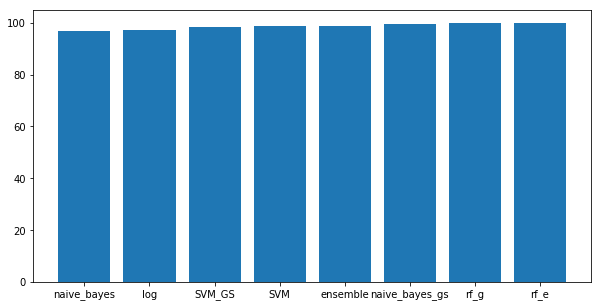

In [36]:
# plotting
accuracy_df = pd.DataFrame.from_dict(result,orient='index')
accuracy_df['algorithm'] = accuracy_df.index
accuracy_df.columns = ['accuracy','algorithm']
accuracy_df = accuracy_df.sort_values('accuracy')
accuracy_df.index = range(accuracy_df.shape[0])
plt.figure(figsize=(10,5))
plt.xticks(range(accuracy_df.shape[0]),list(accuracy_df.algorithm.values))
plt.bar(accuracy_df.index, accuracy_df.accuracy*100)

In [37]:
accuracy_df

accuracy       algorithm
0  0.967822     naive_bayes
1  0.971535             log
2  0.984323          SVM_GS
3  0.988449             SVM
4  0.988861        ensemble
5  0.994224  naive_bayes_gs
6  0.998762            rf_g
7  0.998762            rf_e

# categorizing on test data set

In [38]:
test = pd.read_csv('test.csv')
test.head()

id                                               text
0  3729  2705 4888 5050 5815 2472 5157 652 2117 2110 32...
1  3732  389 4978 315 5178 513 5249 5853 3267 315 3891 ...
2  3761  4478 4231 4858 2638 4231 867 371 686 4888 4179...
3     5  3015 1911 112 3905 825 337 315 1693 4677 825 5...
4     7  5136 3918 5153 2023 3091 4159 315 3711 1409 27...

In [39]:
# best model in the list
to_be_tested = test.text
classified_rf_g_test = text_fitter_rf_g.predict(to_be_tested)
test["rf_g"] =classified_rf_g_test
test.rf_g.value_counts()

0    1360
Name: rf_g, dtype: int64

In [40]:
to_be_tested = test.text
classified_rf_e_test = text_fitter_rf_e.predict(to_be_tested)
test["rf_e"] =classified_rf_e_test
test.rf_e.value_counts()

0    1360
Name: rf_e, dtype: int64

In [41]:
to_be_tested = test.text
classified_nb_test = text_fitter_nb.predict(to_be_tested)
test["nb"] =classified_nb_test
test.nb.value_counts()

0    1359
1       1
Name: nb, dtype: int64

In [42]:
to_be_tested = test.text
classified_svm_test = text_fitter_svm.predict(to_be_tested)
test["svm"] =classified_svm_test
test.svm.value_counts()

0    1360
Name: svm, dtype: int64

In [43]:
to_be_tested = test.text
classified_log_test = text_fitter_log.predict(to_be_tested)
test["log"] =classified_log_test
test.log.value_counts()

0    1360
Name: log, dtype: int64

>## its the same result as the non alogrithmic approach

# Idea 3: Clean the data set by removing common words

In [44]:
train_df = pd.read_csv('training_1.csv')
train_df['text'] = train_df['text'].apply(lambda  s: s.split(" "))
train_df['text'] = train_df['text'].apply(lambda  s: list(set(common_words)-set(s)))
train_df['text'] = train_df['text'].apply(lambda  s: (" ").join(s))
train_df.head()

id  category                                               text
0  959         0  3281 4920 3738 6461 711 5608 5045 5300 3751 74...
1  994         0  3281 4920 3738 6461 711 5608 5045 5300 3751 74...
2  995         0  3281 4920 3738 6461 711 5608 5045 5300 3751 74...
3  996         0  3281 4920 3738 6461 711 5608 5045 5300 3751 74...
4  997         0  3281 4920 3738 6461 711 5608 5045 5300 3751 74...

In [45]:
result_clean = {}
ensemble_clean = {}
x_train, x_test, y_train, y_test = train_test_split(train_df.text, train_df.category, test_size=0.3, random_state=42)
# vectorizing
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
# TF-IDF
tt = TfidfTransformer()
x_train_tfidf = tt.fit_transform(x_train_counts)

In [46]:
# Naive bayes
text_fitter_nb = Pipeline([('vect', count_vect), ('tfidf', tt), ('clf', MultinomialNB())])
text_fitter_nb = text_fitter_nb.fit(x_train, y_train)
classified_nb = text_fitter_nb.predict(x_train)
result_clean["naive_bayes"] = np.mean(classified_nb == y_train)
print(np.mean(classified_nb == y_train))
ensemble_clean["naive_bayes"] = classified_nb
print(metrics.confusion_matrix(y_train, classified_nb)) 

0.9628712871287128
[[2334    0]
 [  90    0]]


In [47]:
# Grid Search for naive bayes
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
text_fitter_nb_gcv = GridSearchCV(text_fitter_nb, parameters, n_jobs=-1)
text_fitter_nb_gcv = text_fitter_nb_gcv.fit(x_train, y_train)
text_fitter_nb_gcv.best_params_
result_clean["naive_bayes_gs"] = text_fitter_nb_gcv.best_score_
text_fitter_nb_gcv.best_score_

0.9801980198019802

In [48]:
classified_nb_gs = text_fitter_nb_gcv.predict(x_train)
result_clean["naive_bayes_gs"] = np.mean(classified_nb_gs == y_train)
print(np.mean(classified_nb_gs == y_train))
ensemble_clean["naive_bayes_gs"] = classified_nb_gs
print(metrics.confusion_matrix(y_train, classified_nb_gs))

0.9925742574257426
[[2333    1]
 [  17   73]]


In [49]:
# SVM
text_fitter_svm = Pipeline([('vect', count_vect), ('tfidf', tt),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])
text_fitter_svm = text_fitter_svm.fit(x_train, y_train)
classified_svm = text_fitter_svm.predict(x_train)
result_clean["SVM"] = np.mean(classified_svm == y_train)
print(np.mean(classified_svm == y_train))
ensemble_clean["SVM"] = classified_svm
print(metrics.confusion_matrix(y_train, classified_svm)) 

0.9628712871287128
[[2334    0]
 [  90    0]]


In [50]:
# Grid Search for SVM
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}
text_fitter_svm_gcv = GridSearchCV(text_fitter_svm, parameters_svm, n_jobs=-1)
text_fitter_svm_gcv = text_fitter_svm_gcv.fit(x_train, y_train)
text_fitter_svm_gcv.best_params_
result_clean["SVM_GS"] = text_fitter_svm_gcv.best_score_
text_fitter_svm_gcv.best_score_

0.9636963696369637

In [51]:
classified_svm_gs = text_fitter_svm_gcv.predict(x_train)
result_clean["naive_baysvm_gs"] = np.mean(classified_svm_gs == y_train)
print(np.mean(classified_svm_gs == y_train))
ensemble_clean["naive_baysvm_gs"] = classified_svm_gs
print(metrics.confusion_matrix(y_train, classified_svm_gs))

0.9682343234323433
[[2334    0]
 [  77   13]]


In [52]:
# Random forest entorpy
text_fitter_rf_e = Pipeline([('vect', count_vect), ('tfidf', tt), ('clf', RandomForestClassifier(criterion="entropy"))])
text_fitter_rf_e.fit(x_train,y_train)
classified_rf_e = text_fitter_rf_e.predict(x_train)
result_clean["rf_e"] = np.mean(classified_rf_e == y_train)
print(np.mean(classified_rf_e == y_train))
ensemble_clean["rf_e"] = classified_rf_e
print(metrics.confusion_matrix(y_train, classified_rf_e)) 

0.9987623762376238
[[2334    0]
 [   3   87]]


In [53]:
# Random forest gini
text_fitter_rf_g = Pipeline([('vect', count_vect), ('tfidf', tt), ('clf', RandomForestClassifier(criterion="gini"))])
text_fitter_rf_g.fit(x_train,y_train)
classified_rf_g = text_fitter_rf_g.predict(x_train)
result_clean["rf_g"] = np.mean(classified_rf_g == y_train)
print(np.mean(classified_rf_g == y_train))
ensemble_clean["rf_g"] = classified_rf_g
print(metrics.confusion_matrix(y_train, classified_rf_g)) 

0.9991749174917491
[[2334    0]
 [   2   88]]


<Container object of 7 artists>

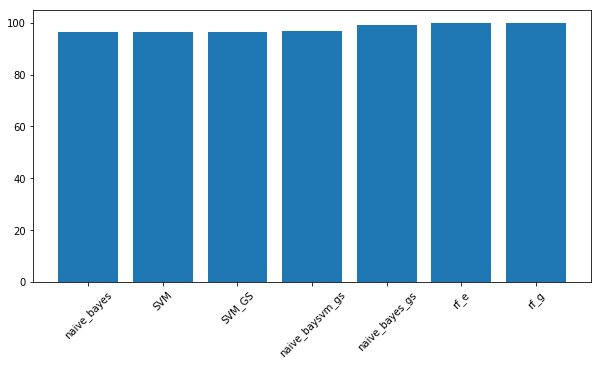

In [54]:
# plotting
accuracy_df = pd.DataFrame.from_dict(result_clean,orient='index')
accuracy_df['algorithm'] = accuracy_df.index
accuracy_df.columns = ['accuracy','algorithm']
accuracy_df = accuracy_df.sort_values('accuracy')
accuracy_df.index = range(accuracy_df.shape[0])
plt.figure(figsize=(10,5))
plt.xticks(range(accuracy_df.shape[0]),list(accuracy_df.algorithm.values),rotation=45)
plt.bar(accuracy_df.index, accuracy_df.accuracy*100)

In [55]:
result

{'SVM': 0.9884488448844885,
 'SVM_GS': 0.9843234323432343,
 'ensemble': 0.9888613861386139,
 'log': 0.9715346534653465,
 'naive_bayes': 0.9678217821782178,
 'naive_bayes_gs': 0.9942244224422442,
 'rf_e': 0.9987623762376238,
 'rf_g': 0.9987623762376238}

In [56]:
result_clean

{'SVM': 0.9628712871287128,
 'SVM_GS': 0.9636963696369637,
 'naive_bayes': 0.9628712871287128,
 'naive_bayes_gs': 0.9925742574257426,
 'naive_baysvm_gs': 0.9682343234323433,
 'rf_e': 0.9987623762376238,
 'rf_g': 0.9991749174917491}

# testing 

In [57]:
test = pd.read_csv('test.csv')
test.head()
to_be_tested = test.text
classified_rf_e_test = text_fitter_rf_e.predict(to_be_tested)
test["rf_e_cleaned"] =classified_rf_e_test
test.rf_e_cleaned.value_counts()

0    1360
Name: rf_e_cleaned, dtype: int64

In [58]:
classified_rf_g_test = text_fitter_rf_g.predict(to_be_tested)
test["rf_g_cleaned"] =classified_rf_g_test
test.rf_g_cleaned.value_counts()

0    1360
Name: rf_g_cleaned, dtype: int64

In [59]:
classified_nb_test = text_fitter_nb_gcv.predict(to_be_tested)
test["nb_cleaned"] =classified_nb_test
test.nb_cleaned.value_counts()

0    1360
Name: nb_cleaned, dtype: int64

In [65]:
always_one = [i for i in ones_text if(i not in common_words)]
always_zero = [i for i in zeros_text if(i not in common_words)]

## cross validation

In [253]:
?cross_val_score

In [255]:
scores = cross_val_score(text_fitter_rf_g, x_train_tfidf , y_train, cv=10)
print ('Cross-validated scores:', scores)

AttributeError: lower not found

# Idea 4 :manually checking for matches andif they are positive

In [80]:
train_1 = train_df[train_df.category==1]

In [84]:
set(train_1.text) & set(test.text)

In [92]:
list(set(train_1.text[i].split(" ")) & set(test.text[j].split(" ")))

['1168', '513']

In [94]:
for i in train_1.index:
    for j in test.index:
        if(len(list(set(train_1.text[i].split(" ")) & set(test.text[j].split(" "))))>(len(train_1.text[i].split(" "))/3)):
            print(j)

In [137]:
# fidning out why error in the manual one occured
one_sum = []
zero_sum = []
correct_ratio = []
wrong_ratio = []

In [138]:
for error_text in list(correctly_classified.text.values):
    one_sum = []
    zero_sum = []
    for i in error_text.split(" "):
        for j in ones_count:
            if(i==j[0]):
#                 print(i,":",j[1])
                one_sum.append(j[1])          
        for j in zeros_count:
            if(i==j[0]):
#                 print(i,":",j[1])
                zero_sum.append(j[1])
    correct_ratio.append(sum(one_sum)/sum(zero_sum))  

In [139]:
for error_text in list(error_classified.text.values):
    one_sum = []
    zero_sum = []
    for i in error_text.split(" "):
        for j in ones_count:
            if(i==j[0]):
#                 print(i,":",j[1])
                one_sum.append(j[1])          
        for j in zeros_count:
            if(i==j[0]):
#                 print(i,":",j[1])
                zero_sum.append(j[1])
    wrong_ratio.append(sum(one_sum)/sum(zero_sum))  

0.01    0.000000
0.10    0.013258
0.25    0.027112
0.75    0.055435
0.90    0.063648
0.95    0.070693
dtype: float64


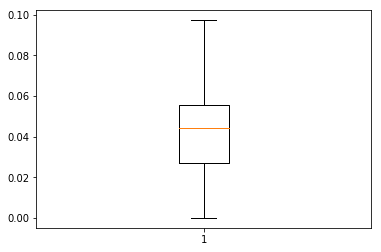

In [161]:
plt.boxplot(correct_ratio,showfliers=False)
print(pd.Series(correct_ratio).quantile([.01,.1,.25,.75,.9,.95]))

0.01    0.074470
0.10    0.074663
0.25    0.074983
0.75    0.106180
0.90    0.140902
1.00    0.164051
dtype: float64


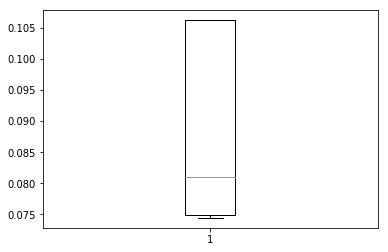

In [158]:
plt.boxplot(wrong_ratio,showfliers=False)
print(pd.Series(wrong_ratio).quantile([.01,.1,.25,.75,.9,1]))

In [ ]:
# the ratio of the count of negative ords to that of a positive word, for 0 is between  0.02 to 0.05 and for 1 is 0.07 to 0.1

In [154]:
# applying this for the test dataset
test = pd.read_csv('test.csv')
test.head()

id                                               text
0  3729  2705 4888 5050 5815 2472 5157 652 2117 2110 32...
1  3732  389 4978 315 5178 513 5249 5853 3267 315 3891 ...
2  3761  4478 4231 4858 2638 4231 867 371 686 4888 4179...
3     5  3015 1911 112 3905 825 337 315 1693 4677 825 5...
4     7  5136 3918 5153 2023 3091 4159 315 3711 1409 27...

In [162]:
test["0_1_ratio"] = np.nan
for i in test.index:
    one_test_ratio = []
    zero_test_ratio = []
    for j in test.text[i].split(" "):
        for k in ones_count:
            if(j==k[0]):
                one_test_ratio.append(k[1])
        for k in zeros_count:
            if(j==k[0]):
                zero_test_ratio.append(k[1])
    test["0_1_ratio"] = sum(one_test_ratio)/sum(zero_test_ratio)
test.head()

id                                               text  0_1_ratio
0  3729  2705 4888 5050 5815 2472 5157 652 2117 2110 32...   0.057143
1  3732  389 4978 315 5178 513 5249 5853 3267 315 3891 ...   0.057143
2  3761  4478 4231 4858 2638 4231 867 371 686 4888 4179...   0.057143
3     5  3015 1911 112 3905 825 337 315 1693 4677 825 5...   0.057143
4     7  5136 3918 5153 2023 3091 4159 315 3711 1409 27...   0.057143

In [178]:
test["category"] = test["0_1_ratio"].apply(lambda x : 0 if x<0.06 else 1)
test.category.value_counts()

0    1360
Name: category, dtype: int64

In [187]:
from_error = pd.DataFrame.from_dict(dict(Counter(list(flatten([i.split(" ") for i in list(error_classified.text.values)])))),orient="index")
from_error["text"] = from_error.index
from_error.index = range(from_error.shape[0])
from_error.head()

0  text
0  1  7702
1  1  1809
2  2  8618
3  1  1179
4  1  4647

In [191]:
from_error["category"] = 1
for i in from_error.index:
        if(from_error.text[i] in zeros_text):
            from_error["category"][i] = 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [200]:
from_error.head()

new  text  old
0    1  7702    0
1    1  1809    0
2    2  8618    0
3    1  1179    0
4    1  4647    0

In [207]:
from_error.columns = ['new','text','old']
# from_error[(from_error["old"]==0) and (from_error['new']>1)]
to_be_moved_to_one = list(from_error.query('old==0 and new>1').text.values)
to_be_moved_to_one

['8618',
 '6461',
 '6155',
 '520',
 '2734',
 '5672',
 '5773',
 '230',
 '4801',
 '6584',
 '5326',
 '6787',
 '4035',
 '1790',
 '753',
 '6589',
 '1651',
 '237']

In [209]:
len(zeros_text)

61788

In [213]:
new_zero_text = [i for i in zeros_text if i not in to_be_moved_to_one] 
len(new_zero_text)

53553

In [214]:
len(ones_text)

3474

In [217]:
new_one_text = ones_text+to_be_moved_to_one
len(new_one_text)

3511

In [222]:
test = pd.read_csv('test.csv')

# finding how many zero and one words come in each line
test["ones_count"] = test.text.apply(lambda s: count_finder(s.split(" "),new_one_text))
test["zeros_count"] = test.text.apply(lambda s: count_finder(s.split(" "),new_zero_text))



0    1358
1       2
Name: category, dtype: int64

In [238]:
# applying the logic derived from above
test["one_by_zero"] = test["ones_count"]/test["zeros_count"]
test["category"] = test["one_by_zero"].apply(lambda s : 1 if s>0.5 else 0)
test.category.value_counts()

0    1333
1      27
Name: category, dtype: int64

In [239]:
test[["id","category"]].to_csv("submission 1.csv",index=False)

In [256]:
# something else to find in train_1
train_1.head()

id  category                                               text
3348  4104         1  3281 4920 3738 711 5608 5045 5300 3751 747 348...
3349  4114         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...
3350  4127         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...
3351  4129         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...
3352  4140         1  3281 4920 3738 6461 711 5608 5045 5300 3751 74...

In [ ]:
compare_common_in_one = {}
for i in common_words:
    for j in ones_count:
        if(i==j[0]):
            compare_common_in_one[i] = j[1]
compare_common_in_zero = {}
for i in common_words:
    for j in zeros_count:
        if(i==j[0]):
            compare_common_in_zero[i] = j[1]

In [276]:
compare_df = pd.DataFrame()
compare_df['text'] = compare_common_in_one.keys()
compare_df['one'] = compare_common_in_one.values()
compare_df['zero'] = compare_common_in_zero.values()
compare_df

text  one  zero
0    3281    1    15
1    8579   10     4
2    6016    3     1
3    4920    6     2
4    7517    1     4
5    3738    4     2
6    5868    1   123
7    6461   37   288
8    7735    4     1
9    2486    7    11
10   5608    1     2
11    102    1    18
12   4343    1     1
13   3474   13    49
14   3978    1     1
15   5795   17   253
16   6567    2     1
17   5045    1   546
18   5300    2    39
19   3751    1    62
20   7527    6     1
21   1509    4     3
22   5031    2     2
23   3485    1    68
24    918    2    56
25    472    3    13
26   1809    2     1
27   7378    5    15
28   8587    1    29
29   5554    1     1
..    ...  ...   ...
602  6973    1     1
603  3647    8   229
604  4112    1    10
605   187    1    13
606  3552    4     4
607  1719    1     1
608  5614    1     2
609   484    2     2
610  2845    1    27
611  8584    3    13
612  2738    3    11
613  3621    1     1
614  3222    1     1
615   119    5     1
616  2230   11   230
617  6035   10     9
618  1112    1     1
619  7355    1     1
620  5599    1     2
621   526    2    26
622  2019    8    21
623  1352    7     4
624  8483    1     2
625  3943    1     7
626  7347    2     1
627  1762    1     1
628  5656    2     5
629  1105    1     3
630  5395    1    15
631  4746    9     3

[632 rows x 3 columns]

3474

In [279]:
compare_df.one = (compare_df.one /one_total)*100
compare_df.zero = (compare_df.zero /zero_total)*100
compare_df

text       one      zero
0    3281  0.028785  0.024277
1    8579  0.287853  0.006474
2    6016  0.086356  0.001618
3    4920  0.172712  0.003237
4    7517  0.028785  0.006474
5    3738  0.115141  0.003237
6    5868  0.028785  0.199068
7    6461  1.065055  0.466110
8    7735  0.115141  0.001618
9    2486  0.201497  0.017803
10   5608  0.028785  0.003237
11    102  0.028785  0.029132
12   4343  0.028785  0.001618
13   3474  0.374208  0.079303
14   3978  0.028785  0.001618
15   5795  0.489349  0.409465
16   6567  0.057571  0.001618
17   5045  0.028785  0.883667
18   5300  0.057571  0.063119
19   3751  0.028785  0.100343
20   7527  0.172712  0.001618
21   1509  0.115141  0.004855
22   5031  0.057571  0.003237
23   3485  0.028785  0.110054
24    918  0.057571  0.090632
25    472  0.086356  0.021040
26   1809  0.057571  0.001618
27   7378  0.143926  0.024277
28   8587  0.028785  0.046935
29   5554  0.028785  0.001618
..    ...       ...       ...
602  6973  0.028785  0.001618
603  3647  0.230282  0.370622
604  4112  0.028785  0.016184
605   187  0.028785  0.021040
606  3552  0.115141  0.006474
607  1719  0.028785  0.001618
608  5614  0.028785  0.003237
609   484  0.057571  0.003237
610  2845  0.028785  0.043698
611  8584  0.086356  0.021040
612  2738  0.086356  0.017803
613  3621  0.028785  0.001618
614  3222  0.028785  0.001618
615   119  0.143926  0.001618
616  2230  0.316638  0.372241
617  6035  0.287853  0.014566
618  1112  0.028785  0.001618
619  7355  0.028785  0.001618
620  5599  0.028785  0.003237
621   526  0.057571  0.042079
622  2019  0.230282  0.033987
623  1352  0.201497  0.006474
624  8483  0.028785  0.003237
625  3943  0.028785  0.011329
626  7347  0.057571  0.001618
627  1762  0.028785  0.001618
628  5656  0.057571  0.008092
629  1105  0.028785  0.004855
630  5395  0.028785  0.024277
631  4746  0.259067  0.004855

[632 rows x 3 columns]

In [60]:
zeros_count

[('5773', 2938),
 ('2734', 1231),
 ('230', 1198),
 ('237', 1177),
 ('6084', 1108),
 ('3078', 1043),
 ('7526', 947),
 ('8542', 771),
 ('5922', 735),
 ('4017', 682),
 ('2698', 613),
 ('5071', 582),
 ('6300', 565),
 ('224', 561),
 ('5045', 546),
 ('6700', 523),
 ('753', 517),
 ('8406', 454),
 ('4211', 415),
 ('7924', 380),
 ('1994', 365),
 ('6517', 328),
 ('6461', 288),
 ('5672', 279),
 ('7945', 276),
 ('5107', 275),
 ('5658', 263),
 ('2963', 259),
 ('5795', 253),
 ('3283', 231),
 ('2230', 230),
 ('3647', 229),
 ('4608', 224),
 ('1444', 224),
 ('7860', 222),
 ('3968', 220),
 ('7152', 215),
 ('2269', 214),
 ('4442', 212),
 ('6527', 210),
 ('6193', 203),
 ('5085', 198),
 ('1543', 197),
 ('7669', 195),
 ('5819', 190),
 ('6794', 184),
 ('5174', 175),
 ('6349', 170),
 ('7343', 164),
 ('5326', 161),
 ('203', 159),
 ('6254', 159),
 ('3718', 158),
 ('5035', 157),
 ('1698', 156),
 ('254', 154),
 ('3468', 152),
 ('3581', 152),
 ('6589', 150),
 ('8075', 150),
 ('6980', 149),
 ('6619', 147),
 ('5551'

In [64]:
always_one = [i for i in ones_text if(i not in common_words)]

['5691',
 '5691',
 '7387',
 '7863',
 '6111',
 '2141',
 '2408',
 '1586',
 '8178',
 '4552',
 '8509',
 '8423',
 '18',
 '6693',
 '8461',
 '2032',
 '3763',
 '1200',
 '3012',
 '3296',
 '819',
 '332',
 '7259',
 '7185',
 '8552',
 '1940',
 '3708',
 '3872',
 '6878',
 '3159',
 '6043',
 '1972',
 '7173',
 '5095',
 '2278',
 '1807',
 '6453',
 '8449',
 '6746',
 '5327',
 '2359',
 '1329',
 '1586',
 '3491',
 '8178',
 '4552',
 '6901',
 '8393',
 '8107',
 '3763',
 '1200',
 '6497',
 '3296',
 '1646',
 '5794',
 '20',
 '5173',
 '765',
 '8039',
 '5814',
 '3985',
 '146',
 '2495',
 '2996',
 '3145',
 '5814',
 '5002',
 '3544',
 '2197',
 '2220',
 '7679',
 '1288',
 '7274',
 '8539',
 '5890',
 '3764',
 '5890',
 '6669',
 '250',
 '1633',
 '8539',
 '4088',
 '3721',
 '4705',
 '7422',
 '8100',
 '2438',
 '3748',
 '4690',
 '3032',
 '4141',
 '994',
 '5010',
 '2204',
 '7062',
 '5187',
 '2235',
 '6426',
 '1400',
 '1111',
 '2045',
 '8367',
 '1291',
 '2058',
 '6043',
 '6354',
 '7044',
 '1231',
 '1725',
 '8387',
 '6896',
 '2416',
 '